In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/davidrendon/Documents/SUP/GMMHMM/Spectralclustering'

In [311]:
dp = pd.read_csv("rmsmadis.csv")
dp.head()

,Unnamed: 0,RMS,M,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,Unnamed: 14
0,0,1.072868,1.091538,0.304291,-0.272487,-0.351247,-0.382524,-0.750027,-0.119213,0.040488,-0.820264,-1.346984,-1.411314,-1.577544,1
1,1,1.083936,1.093265,0.148371,-0.222967,-0.454905,0.213315,-0.534199,-0.057588,-0.309812,-0.928569,-1.478019,-1.505071,-1.838332,1
2,2,1.084149,1.096589,0.410341,0.026921,-0.365451,0.255986,-0.170349,0.118407,-0.094078,-0.760873,-1.741872,-1.936558,-2.001351,1
3,3,1.168895,1.124790,-0.108838,-0.527461,-0.865294,0.116820,-0.723642,-0.498732,-1.025477,-1.622355,-2.117899,-2.105918,-2.604525,1
4,4,1.094643,1.101882,0.470973,-0.402072,-0.705257,0.092456,-0.521666,-0.328160,-0.286492,-0.985780,-1.641665,-1.845428,-2.278602,1


In [312]:
dpprueba = pd.read_csv("dataprofeprueba.csv")
dpprueba

,Unnamed: 0,RMS,M,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
0,0,0.098528,0.165461,-0.387069,-1.193796,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.086051,-1.240672,-1.706252,1
1,1,0.078268,0.147016,-0.099193,-0.993285,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-1.062085,-1.581943,-1.785024,1
2,2,0.070684,0.138736,-0.204276,-1.114778,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-0.668618,-1.066334,-1.383000,1
3,3,0.080139,0.152574,1.080125,0.455753,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.499750,-0.505977,-0.667956,1
4,4,-1.052360,-1.116420,-1.102244,-2.994605,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.091376,-0.624228,-0.321369,1
5,5,0.090997,0.165124,1.033778,0.627818,0.708868,0.963987,-0.570432,-0.688682,-0.226930,0.221637,-0.154145,0.244069,0.375437,1
6,6,-1.042198,-1.196788,-0.478329,-0.293518,0.077899,0.589451,-0.249145,-0.273430,-0.084927,-0.343678,0.118776,0.012453,0.271644,1
7,7,-1.162809,-1.230743,-0.481549,-0.485850,-0.437192,0.114116,-0.774177,-1.367703,-0.777009,-0.805050,-0.044871,0.152163,0.264317,1
8,8,-1.113244,-1.218440,-0.461694,-0.506682,-0.141881,0.227449,-0.997138,-1.313531,-0.829717,-0.556271,-0.016804,-0.136467,0.219988,1
9,9,-0.995019,-1.142759,-0.837957,-1.356096,-1.482856,-0.116152,-1.960741,-2.808610,-1.937638,-2.478580,-1.538678,-0.954723,-0.998196,1


In [313]:
yprueba=dpprueba.iloc[:,14]

In [314]:
yp=dp.iloc[:,14]


In [315]:
dp=dp.iloc[:,1:14] ##Se borra la fila target y la primera del df
dprueba=dpprueba.iloc[:,1:14] ##Se borra la fila target y la primera del df

In [321]:
#print('y datos', yp);
#print('ypruebadatos',yprueba);
dprueba.head()

,RMS,M,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.098528,0.165461,-0.387069,-1.193796,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.086051,-1.240672,-1.706252
1,0.078268,0.147016,-0.099193,-0.993285,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-1.062085,-1.581943,-1.785024
2,0.070684,0.138736,-0.204276,-1.114778,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-0.668618,-1.066334,-1.383000
3,0.080139,0.152574,1.080125,0.455753,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.499750,-0.505977,-0.667956
4,-1.052360,-1.116420,-1.102244,-2.994605,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.091376,-0.624228,-0.321369


In [752]:
# -*- coding: utf-8 -*-
"""Algorithms for spectral clustering"""

# Author: Gael Varoquaux gael.varoquaux@normalesup.org
#         Brian Cheung
#         Wei LI <kuantkid@gmail.com>
# License: BSD 3 clause
import warnings
import numpy as n 
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_random_state, as_float_array
from sklearn.utils.validation import check_array
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import spectral_embedding
from sklearn.cluster.k_means_ import k_means
from sklearn.cluster import KMeans  

def discretize(vectors, copy=True, max_svd_restarts=30, n_iter_max=20,
               random_state=None):

    from scipy.sparse import csc_matrix
    from scipy.linalg import LinAlgError

    random_state = check_random_state(random_state)

    vectors = as_float_array(vectors, copy=copy)

    eps = np.finfo(float).eps
    n_samples, n_components = vectors.shape

    # Normalize the eigenvectors to an equal length of a vector of ones.
    # Reorient the eigenvectors to point in the negative direction with respect
    # to the first element.  This may have to do with constraining the
    # eigenvectors to lie in a specific quadrant to make the discretization
    # search easier.
    norm_ones = np.sqrt(n_samples)
    for i in range(vectors.shape[1]):
        vectors[:, i] = (vectors[:, i] / np.linalg.norm(vectors[:, i])) \
            * norm_ones
        if vectors[0, i] != 0:
            vectors[:, i] = -1 * vectors[:, i] * np.sign(vectors[0, i])

    # Normalize the rows of the eigenvectors.  Samples should lie on the unit
    # hypersphere centered at the origin.  This transforms the samples in the
    # embedding space to the space of partition matrices.
    vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]

    svd_restarts = 0
    has_converged = False

    # If there is an exception we try to randomize and rerun SVD again
    # do this max_svd_restarts times.
    while (svd_restarts < max_svd_restarts) and not has_converged:

        # Initialize first column of rotation matrix with a row of the
        # eigenvectors
        rotation = np.zeros((n_components, n_components))
        rotation[:, 0] = vectors[random_state.randint(n_samples), :].T

        # To initialize the rest of the rotation matrix, find the rows
        # of the eigenvectors that are as orthogonal to each other as
        # possible
        c = np.zeros(n_samples)
        for j in range(1, n_components):
            # Accumulate c to ensure row is as orthogonal as possible to
            # previous picks as well as current one
            c += np.abs(np.dot(vectors, rotation[:, j - 1]))
            rotation[:, j] = vectors[c.argmin(), :].T

        last_objective_value = 0.0
        n_iter = 0

        while not has_converged:
            n_iter += 1

            t_discrete = np.dot(vectors, rotation)

            labels = t_discrete.argmax(axis=1)
            vectors_discrete = csc_matrix(
                (np.ones(len(labels)), (np.arange(0, n_samples), labels)),
                shape=(n_samples, n_components))

            t_svd = vectors_discrete.T * vectors

            try:
                U, S, Vh = np.linalg.svd(t_svd)
                svd_restarts += 1
            except LinAlgError:
                print("SVD did not converge, randomizing and trying again")
                break

            ncut_value = 2.0 * (n_samples - S.sum())
            if ((abs(ncut_value - last_objective_value) < eps) or
                    (n_iter > n_iter_max)):
                has_converged = True
            else:
                # otherwise calculate rotation and continue
                last_objective_value = ncut_value
                rotation = np.dot(Vh.T, U.T)

    if not has_converged:
        raise LinAlgError('SVD did not converge')
    return labels


def spectral_clustering(affinity, n_clusters=8, n_components=None,
                        eigen_solver=None, random_state=None, n_init=20,
                        eigen_tol=0.0, assign_labels='kmeans',predict=False,kmeans=None):

    if assign_labels not in ('kmeans', 'discretize'):
        raise ValueError("The 'assign_labels' parameter should be "
                         "'kmeans' or 'discretize', but '%s' was given"
                         % assign_labels)

    random_state = check_random_state(random_state)
    n_components = n_clusters if n_components is None else n_components

    # The first eigen vector is constant only for fully connected graphs
    # and should be kept for spectral clustering (drop_first = False)
    # See spectral_embedding documentation.
    maps = spectral_embedding(affinity, n_components=n_components,
                              eigen_solver=eigen_solver,
                              random_state=random_state,
                              eigen_tol=eigen_tol, drop_first=False)
    if assign_labels == 'kmeans':
        if predict==False:
            
            kmeans = KMeans( n_clusters,
                               n_init=10, tol=1e-20)
            #kmeans.fit(maps)

            labels=kmeans.fit(maps)                
              #a, labels, b = k_means(maps, n_clusters, random_state=random_state,
               #                n_init=n_init)
        #print('a',a)
        #print('b',b)
        else:
            labels =kmeans.predict(maps)
        
    else:
        labels = discretize(maps, random_state=random_state)
    
    
    return labels,kmeans,maps


class SpectralClustering(BaseEstimator, ClusterMixin):

    def __init__(self, n_clusters=8, eigen_solver=None, random_state=None,
                 n_init=12, gamma=1., affinity='rbf', n_neighbors=10,
                 eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1,
                 kernel_params=None, n_jobs=None, maps=None):
        self.n_clusters = n_clusters
        self.eigen_solver = eigen_solver
        self.random_state = random_state
        self.n_init = n_init
        self.gamma = gamma
        self.affinity = affinity
        self.n_neighbors = n_neighbors
        self.eigen_tol = eigen_tol
        self.assign_labels = assign_labels
        self.degree = degree
        self.coef0 = coef0
        self.kernel_params = kernel_params
        self.n_jobs = n_jobs
        self.maps=maps
        self.kmeans=[]
        #self.entrenamiento=[]
        
    def fit(self, X, y=None):
        self.entrenamiento=X
        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'],
                        dtype=np.float64, ensure_min_samples=2)
        if X.shape[0] == X.shape[1] and self.affinity != "precomputed":
            warnings.warn("The spectral clustering API has changed. ``fit``"
                          "now constructs an affinity matrix from data. To use"
                          " a custom affinity matrix, "
                          "set ``affinity=precomputed``.")

        if self.affinity == 'nearest_neighbors':
            connectivity = kneighbors_graph(X, n_neighbors=self.n_neighbors,
                                            include_self=True,
                                            n_jobs=self.n_jobs)
            self.affinity_matrix_ = 0.5 * (connectivity + connectivity.T)
        elif self.affinity == 'precomputed':
            self.affinity_matrix_ = X
        else:
            params = self.kernel_params
            if params is None:
                params = {}
            if not callable(self.affinity):
                params['gamma'] = self.gamma
                params['degree'] = self.degree
                params['coef0'] = self.coef0
            self.affinity_matrix_ = pairwise_kernels(X, metric=self.affinity,
                                                     filter_params=True,
                                                     **params)

        random_state = check_random_state(self.random_state)
        self.labels,self.kmeans,self.maps= spectral_clustering(self.affinity_matrix_,
                                           n_clusters=self.n_clusters,
                                           eigen_solver=self.eigen_solver,
                                           random_state=random_state,
                                           n_init=self.n_init,
                                           eigen_tol=self.eigen_tol,
                                           assign_labels=self.assign_labels,
                                           predict=False        )

        return self
    

    
    def predict(self,X, y=None):
        #x=self.entrenamiento.append(X,sort=False)
        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'],
                        dtype=np.float64, ensure_min_samples=2)
        if X.shape[0] == X.shape[1] and self.affinity != "precomputed":
            warnings.warn("The spectral clustering API has changed. ``fit``"
                          "now constructs an affinity matrix from data. To use"
                          " a custom affinity matrix, "
                          "set ``affinity=precomputed``.")

        if self.affinity == 'nearest_neighbors':
            connectivity = kneighbors_graph(X, n_neighbors=self.n_neighbors,
                                            include_self=True,
                                            n_jobs=self.n_jobs)
            self.affinity_matrix_ = 0.5 * (connectivity + connectivity.T)
        elif self.affinity == 'precomputed':
            self.affinity_matrix_ = X
        else:
            params = self.kernel_params
            if params is None:
                params = {}
            if not callable(self.affinity):
                params['gamma'] = self.gamma
                params['degree'] = self.degree
                params['coef0'] = self.coef0
            self.affinity_matrix_ = pairwise_kernels(X, metric=self.affinity,
                                                     filter_params=True,
                                                     **params)
            random_state = check_random_state(self.random_state)
        self.labels,self.kmeans,self.maps= spectral_clustering(self.affinity_matrix_,
                                           n_clusters=self.n_clusters,
                                           eigen_solver=self.eigen_solver,
                                           random_state=self.random_state,
                                           n_init=self.n_init,
                                           eigen_tol=self.eigen_tol,
                                           assign_labels=self.assign_labels,
                                           predict=True,kmeans=self.kmeans
                                           )
        return self.labels
    
    @property
    def _pairwise(self):
        return self.affinity == "precomputed"

In [499]:
#dp.append(dprueba);
#model.affinity_matrix_.shape
#model.maps.shape

In [753]:

x=dp
model = SpectralClustering(n_clusters=3, n_init=11,affinity='nearest_neighbors')

maps=[]
fitmodel= model.fit(x)
#accuracyS= accuracy_score(yp,labels)
    #accuracyyt[i]= accuracy_score(labels,yt)
    #accmoreclus[i]=homogeneity_score(labels,yt)
#labels=fitmodel.fit_predict(dataprofe)
#accuracyS
#aff=fitmodel.affinity_matrix_


In [756]:
fitmodel.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [755]:
model.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [757]:
labels=model.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [758]:
labelspredict=model.predict(dprueba)
labelspredict

array([2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [438]:
labels=labelspredict[0:67]
labelspredictt=labelspredict[68:labelspredict.size]

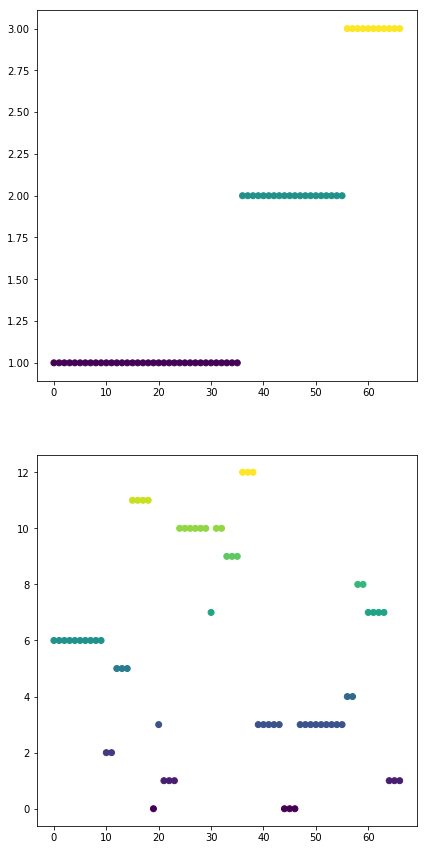

In [427]:


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dp.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [429]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 3
    elif item == 8  :
        item = 1
    elif item == 9  :
        item = 1    
    elif item == 10  :
        item = 1
    elif item == 11  :
        item = 1
    elif item == 13  :
        item = 2
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)



0.835820895522388

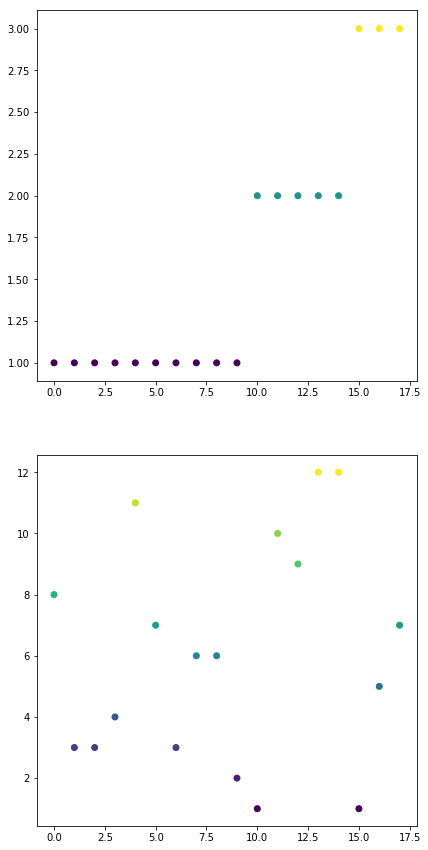

In [431]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dprueba.shape[0])
y=yp

img = ax.scatter(x, yprueba, c=yprueba, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labelspredict, c=labelspredict, cmap=plt.viridis())
plt.show()

In [430]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labelspredict:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 3
    elif item == 8  :
        item = 1
    elif item == 9  :
        item = 1    
    elif item == 10  :
        item = 1
    elif item == 11  :
        item = 1
    elif item == 13  :
        item = 2
 
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yprueba,newlist)

0.3333333333333333

In [177]:
newlist

[3, 1, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1]

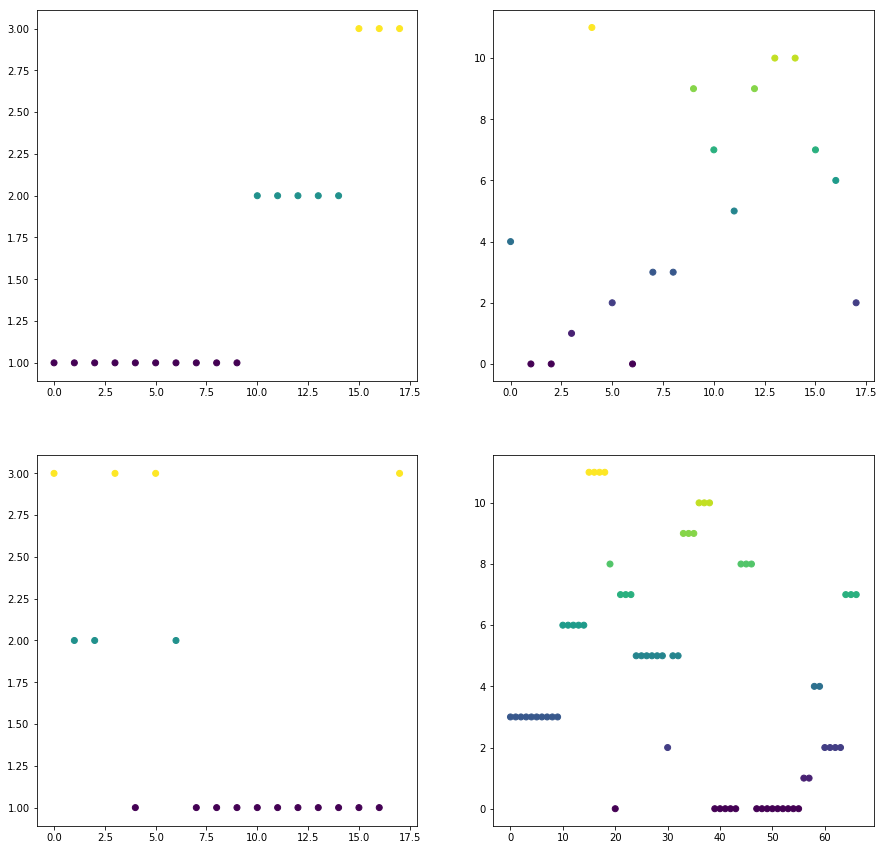

In [350]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dprueba.shape[0])
y=yp

img = ax.scatter(x, yprueba, c=yprueba, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
axxx = fig.add_subplot(2,2,2)
img = axxx.scatter(x, labelspredict, c=labelspredict, cmap=plt.viridis())
axxxx = fig.add_subplot(2,2,4)
img = axxxx.scatter(np.arange(dp.shape[0]), labels, c=labels, cmap=plt.viridis())
plt.show()

In [505]:
#Ejemplo de clasification basico por spectral clustering

Text(0.5, 1.0, 'Incorrect Number of Blobs')

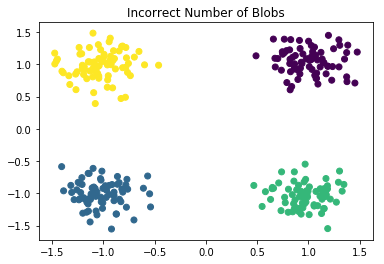

In [675]:
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, y= make_blobs(n_samples=300, centers=centers, cluster_std=0.2,
                            random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Incorrect Number of Blobs")

Text(0.5, 1.0, 'Incorrect Number of Blobs')

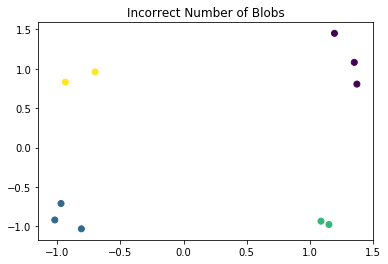

In [676]:
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
Xpred, ypred= make_blobs(n_samples=10, centers=centers, cluster_std=0.2,
                            random_state=0)
plt.scatter(Xpred[:, 0], Xpred[:, 1], c=ypred)
plt.title("Incorrect Number of Blobs")

In [677]:
df=pd.DataFrame(X)
df['target']=y
df=df.sort_values(by='target')

dfpr=pd.DataFrame(Xpred)
dfpr['target']=ypred
dfpr=dfpr.sort_values(by='target')

In [759]:

x=df.iloc[:,0:2]
y=df.target
xp=dfpr.iloc[:,0:2]
yp=dfpr.target
model = SpectralClustering(n_clusters=4, n_init=11)

maps=[]
fitmodel= model.fit(x)

In [763]:
model.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [762]:
labels=model.predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [764]:
labelspredict=model.predict(xp)

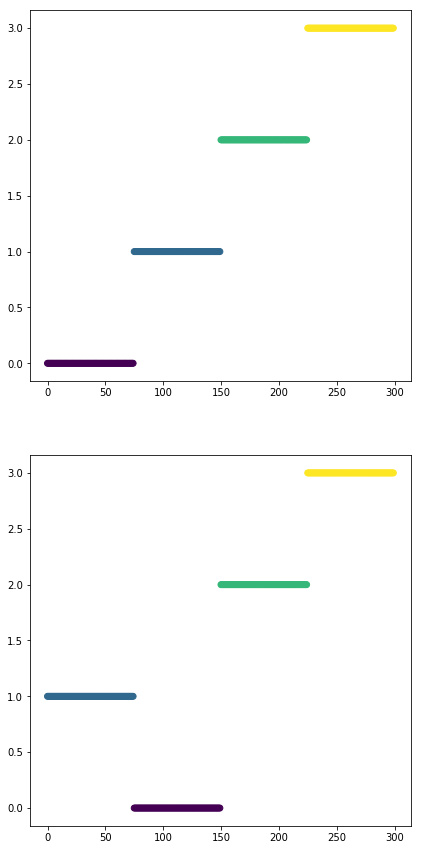

In [765]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(X.shape[0])

img = ax.scatter(x, y, c=y, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [766]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 0
    elif item == 2  :
        item = 2
    elif item == 3  :
        item = 3 
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(y,newlist)

1.0

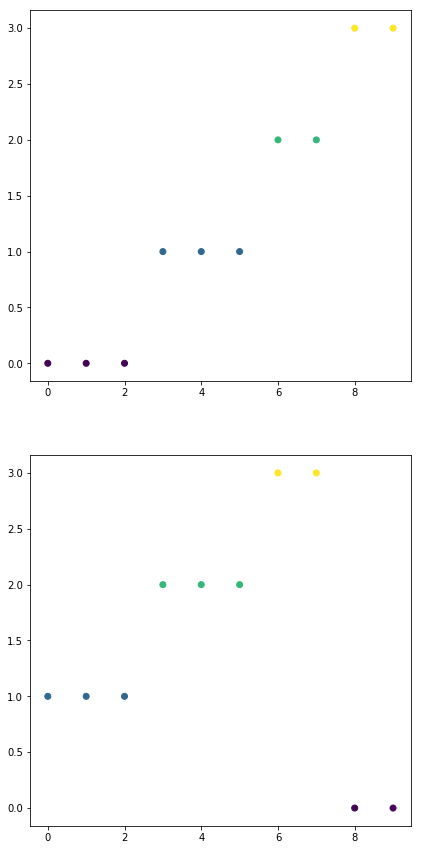

In [767]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(xp.shape[0])

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x,labelspredict , c=labelspredict, cmap=plt.viridis())
plt.show()

In [768]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labelspredict:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 0
    elif item == 2  :
        item = 2
    elif item == 3  :
        item = 3 
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(ypred,newlist)

0.2

In [738]:

x=df.iloc[:,0:2]
y=df.target
xp=dfpr.iloc[:,0:2]
yp=dfpr.target
kmeans = KMeans(n_clusters=4, n_init=10, tol=1e-20) ##tool default 1e-4

kmeans.fit(x)
labels = kmeans.predict(x)

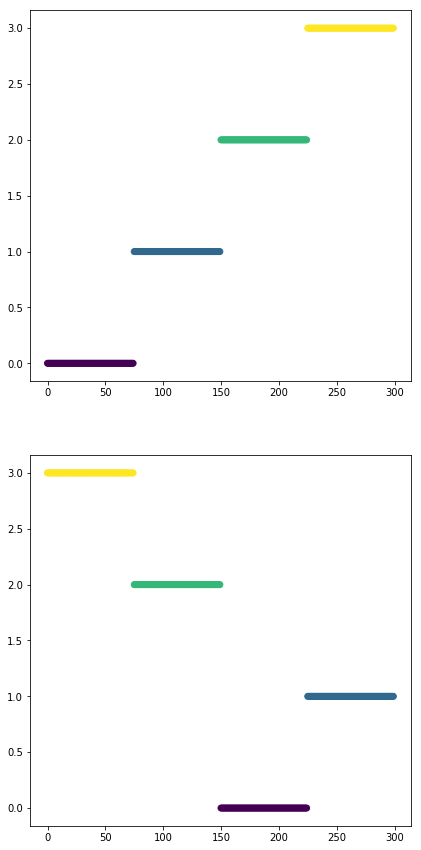

In [739]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(X.shape[0])

img = ax.scatter(x, y, c=y, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [740]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 3
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 0 
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(y,newlist)

1.0

1.0


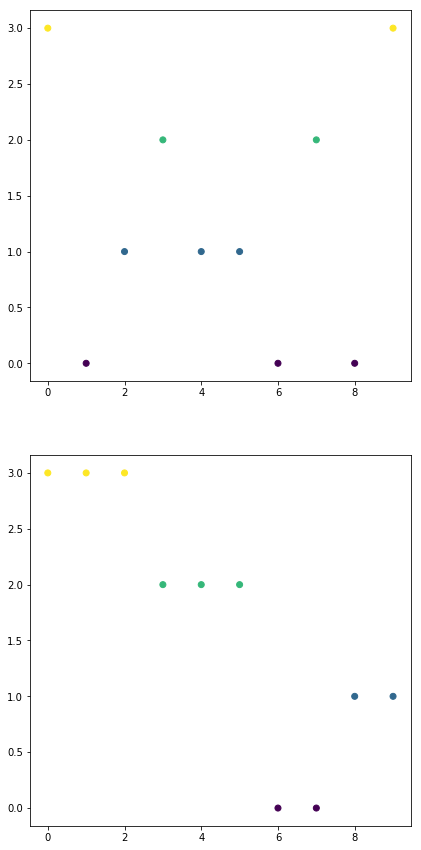

In [751]:
labelspred = kmeans.predict(xp)
newlist = []

for item in labelspred:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 3
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 0 
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(yp,newlist))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(Xpred.shape[0])

img = ax.scatter(x, ypred, c=ypred, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labelspred, c=labelspred, cmap=plt.viridis())
plt.show()

In [749]:
newlist


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


Algorithms for spectral clustering
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


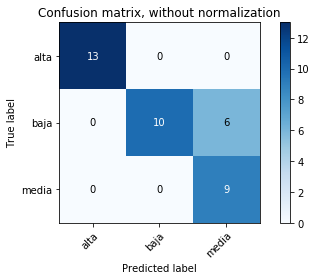

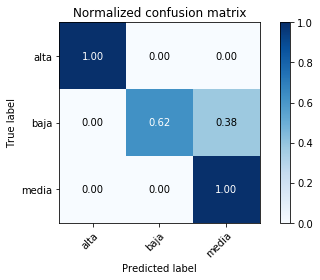

In [781]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [790]:
class_names[0]

'setosa'

In [785]:
a=np.array(['alta','baja','media'])

In [786]:
a


array(['alta', 'baja', 'media'], dtype='<U5')

In [789]:
class_names = iris.target_names


In [791]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')